# Hackathon Starter Code
## Introduction to Machine Learning
### July 4th, 2019

---

### Hackathon Overview

**What is a Hackathon?**

A "hackathon" is an intense 1 or 2 day event in which those working in tech (e.g. programmer, graphic designers, data scientists) work with domain experts to collaborate on software projects.
The goal of a hackathon is to create usable software or hardware with the goal of producing a functioning product by the end of the event. Hackathons tend to have a specific focus, for example, on solving a single real-life problem.

**What is this Hackathon about?**

In this hackathon, you will be building a machine learning algorithm to help credit card companies predict if a client will default on their credit card payment in the next month. 

**What data are you given?**

You will be using real-life financial data of the credit card clients. You are given three files:

1. `default_data.csv` - a csv (comma separated values) file containing both the attributes and the outcome (default or no default)
2. `default_data_x_test.csv` - a csv (comma seperated values) file containing the attributes of the test data. **Note:** you do not have access to the true labels of the test data!
3. `default_data_key.xlsx` - an excel file explaining the meaning of the attributes


**How will we evaluate your model?**

You model will be evaluated on a held-out test dataset. You are given the attributes of this test data set, `default_data_x_test.csv`, but only we have the labels of the test data.

Your model will be evaluated by the [***balanced accuracy score***](https://scikit-learn.org/stable/modules/model_evaluation.html#balanced-accuracy-score) of it's prediction on the test data. The balanced accuracy score measures the average of the number of correctly classified instances for each class weighted inversely by the size of each class. The balanced accuracy score takes into account class imbalance. For balanced datasets, balanced accuracy score is equal to accuracy.

You may test your model using [`sklearn` implementation of the `balanced_accuracy_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html).

**How are the winners determined and what do they get?**

Groups who are able to beat the score, `0.6169`, of our baseline model on the test set will receive a certificate of achievement.

The group(s) with the highest score will receive Harvard and/or Boston souvenirs.

### Submission instructions
At the end of the hackathon, we will release the true labels for the test set. You will then evaluate your predicted labels using the balanced accuracy score. You will report this score to us.

### Hackathon Rules
1. You must work in teams of 4-5. 
2. Your team must contain sufficient diversity in terms of background and field of study. For example, you can not form a team of all business students or all computer science students etc.
3. You are encouraged to use all internet resources. You are encouraged to use any and all code from class or from homework. 
4. You may transform the original features in any way you like.
5. You may use any model you want (including neural networks).


#### Import important libraries

In [7]:
#import the evaluatation metric
from sklearn.metrics import balanced_accuracy_score
#pandas library for reading data
import pandas as pd
#numpy library for computation with matrices and arrays
import numpy as np
#matplotlib library for visualization
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
#command for displaying visualizations within the notebook
%matplotlib inline

from sklearn.metrics import confusion_matrix, recall_score, precision_score

import seaborn as sns

---

## I. Exploratory Data Analysis

#### Load the data from file

In [9]:
loan_df = pd.read_csv('hackathon_data/default_data.csv')

#### Print the first 5 rows of the data

In [10]:
loan_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
loan_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

#### Get a idea of the size of the data set

In [15]:
print(loan_df.shape)

(30000, 25)


#### Print all the column titles

In [37]:
x.columns=x.columns.str.lower()
column_list=x.columns.tolist()

In [38]:
print(column_list)

['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']


In [39]:
len(column_list)

23

## II. Creating `x` and `y`

#### Extract the labels

In [30]:
y = loan_df['default payment next month']

#### Extract the features

In [31]:
x = loan_df.drop(['ID', 'default payment next month'], axis=1)

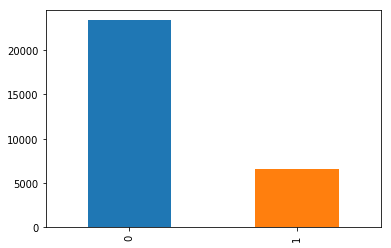

In [32]:
y.value_counts().plot(kind='bar');

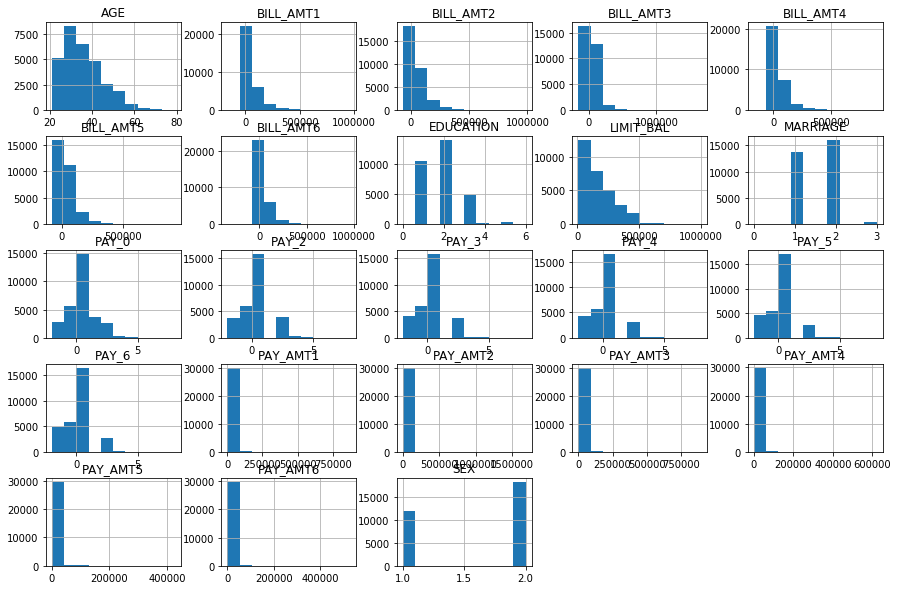

In [33]:
# plt.figure(figsize=(10,10))
x.hist(figsize=(15,10));

In [40]:
df=x.describe().T
df['missing'] = 1-df['count']/len(x)
df


,count,mean,std,min,25%,50%,75%,max,missing
limit_bal,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0,0.0
sex,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0,0.0
education,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0,0.0
marriage,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0,0.0
age,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0,0.0
pay_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0,0.0
pay_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0,0.0
pay_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0,0.0
pay_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0,0.0
pay_5,30000.0,-0.266200,1.133187,-2.0,-1.00,0.0,0.00,8.0,0.0


In [41]:
df = pd.concat([x,y], axis=1)
df.head()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [46]:
df['default_payment'] = df['default payment next month'].map({0:'no',1:'yes'})

In [47]:
df.head()

,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default payment next month,default_payment
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,689,0,0,0,0,1,yes
1,120000,2,2,2,26,-1,2,0,0,0,...,3455,3261,0,1000,1000,1000,0,2000,1,yes
2,90000,2,2,2,34,0,0,0,0,0,...,14948,15549,1518,1500,1000,1000,1000,5000,0,no
3,50000,2,2,1,37,0,0,0,0,0,...,28959,29547,2000,2019,1200,1100,1069,1000,0,no
4,50000,1,2,1,57,-1,0,-1,0,0,...,19146,19131,2000,36681,10000,9000,689,679,0,no


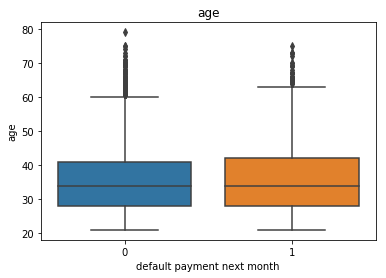

In [56]:
sns.boxplot(x='default payment next month', y='age', data=df)
plt.title('age');

Text(0.5,1,'pay_0')

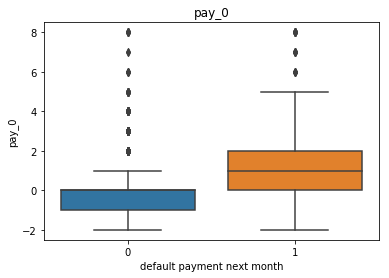

In [58]:
sns.boxplot(x='default payment next month', y='pay_0', data=df)
plt.title('pay_0')

Text(0.5,1,'pay_2')

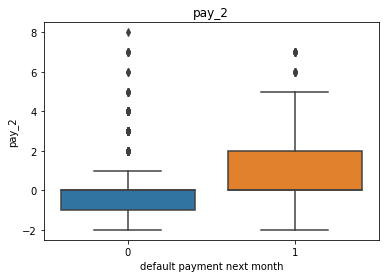

In [59]:
sns.boxplot(x='default payment next month', y='pay_2', data=df)
plt.title('pay_2')

Text(0.5,1,'pay_3')

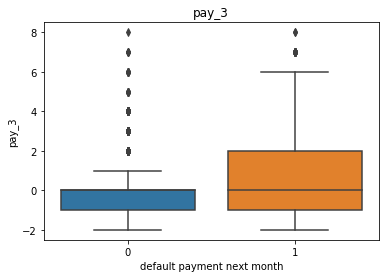

In [60]:
sns.boxplot(x='default payment next month', y='pay_3', data=df)
plt.title('pay_3')

Text(0.5,1,'pay_4')

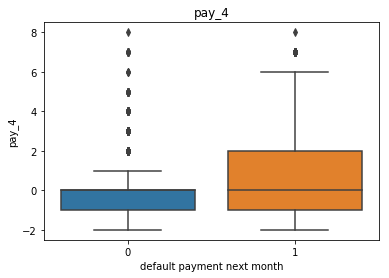

In [61]:
sns.boxplot(x='default payment next month', y='pay_4', data=df)
plt.title('pay_4')

Text(0.5,1,'pay_5')

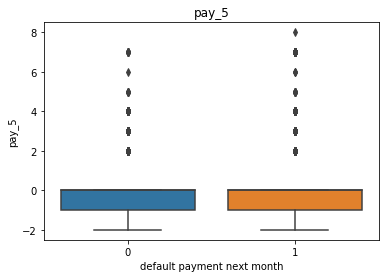

In [62]:
sns.boxplot(x='default payment next month', y='pay_5', data=df)
plt.title('pay_5')

Text(0.5,1,'pay_6')

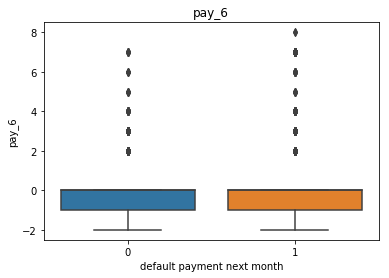

In [63]:
sns.boxplot(x='default payment next month', y='pay_6', data=df)
plt.title('pay_6')

Text(0.5,1,'bill_amt1')

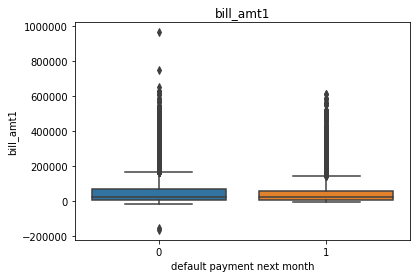

In [65]:
sns.boxplot(x='default payment next month', y='bill_amt1', data=df)
plt.title('bill_amt1')

Text(0.5,1,'bill_amt2')

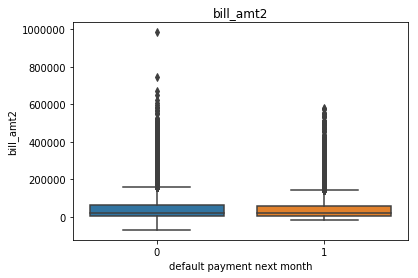

In [66]:
sns.boxplot(x='default payment next month', y='bill_amt2', data=df)
plt.title('bill_amt2')

Text(0.5,1,'bill_amt3')

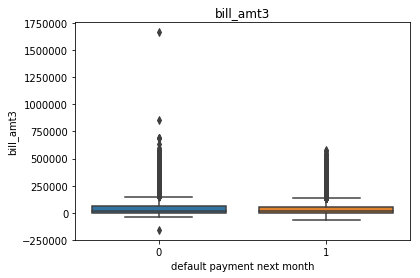

In [67]:
sns.boxplot(x='default payment next month', y='bill_amt3', data=df)
plt.title('bill_amt3')

Text(0.5,1,'bill_amt4')

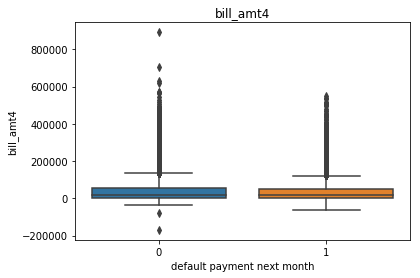

In [68]:
sns.boxplot(x='default payment next month', y='bill_amt4', data=df)
plt.title('bill_amt4')

Text(0.5,1,'bill_amt5')

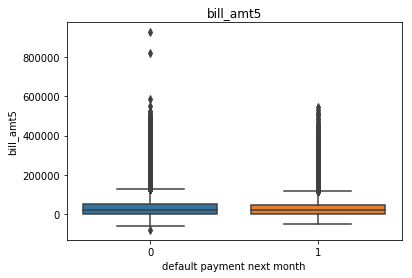

In [69]:
sns.boxplot(x='default payment next month', y='bill_amt5', data=df)
plt.title('bill_amt5')

Text(0.5,1,'bill_amt6')

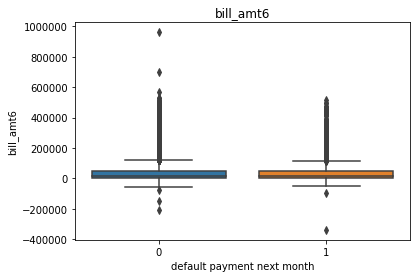

In [70]:
sns.boxplot(x='default payment next month', y='bill_amt6', data=df)
plt.title('bill_amt6')

Text(0.5,1,'pay_amt1')

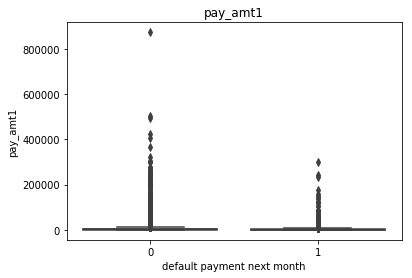

In [72]:
sns.boxplot(x='default payment next month', y='pay_amt1', data=df)
plt.title('pay_amt1')

Text(0.5,1,'pay_amt2')

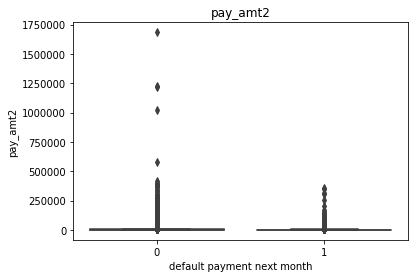

In [73]:
sns.boxplot(x='default payment next month', y='pay_amt2', data=df)
plt.title('pay_amt2')

Text(0.5,1,'pay_amt3')

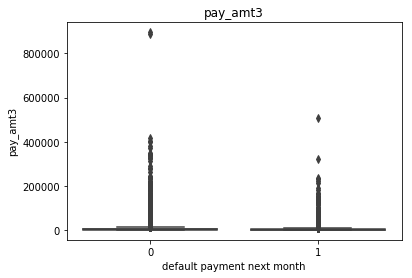

In [74]:
sns.boxplot(x='default payment next month', y='pay_amt3', data=df)
plt.title('pay_amt3')

Text(0.5,1,'pay_amt4')

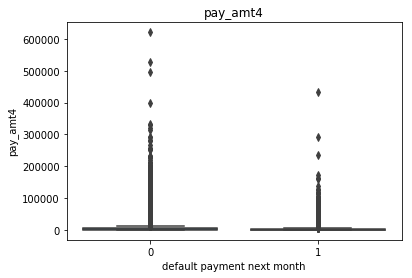

In [75]:
sns.boxplot(x='default payment next month', y='pay_amt4', data=df)
plt.title('pay_amt4')

Text(0.5,1,'pay_amt5')

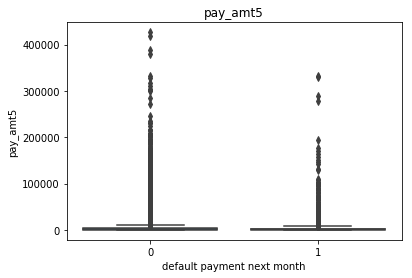

In [76]:
sns.boxplot(x='default payment next month', y='pay_amt5', data=df)
plt.title('pay_amt5')

Text(0.5,1,'pay_amt6')

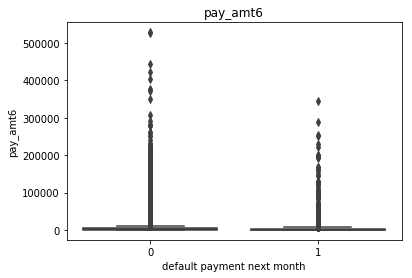

In [77]:
sns.boxplot(x='default payment next month', y='pay_amt6', data=df)
plt.title('pay_amt6')

In [43]:
print(column_list)

['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']


In [84]:
import pandas_profiling as pp

In [88]:
pp.ProfileReport(df)

Number of variables,25
Number of observations,30000
Total Missing (%),0.0%
Total size in memory,5.7 MiB
Average record size in memory,200.0 B
Numeric,17
Categorical,1
Boolean,2
Date,0
Text (Unique),0
Rejected,5


In [90]:
print(column_list)

['limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']


In [91]:
df.drop_duplicates(inplace=True)

In [92]:
from sklearn.ensemble import RandomForestClassifier

In [94]:
df.drop(labels=['bill_amt2','bill_amt3','bill_amt4','bill_amt5', 'bill_amt6'],axis=1 ,inplace=True)

In [95]:
from sklearn.model_selection import train_test_split

---

## III. Fit your model and anything else you want

In [99]:
df.drop(labels='default_payment', inplace=True, axis=1)

In [101]:
df.columns.tolist()

['limit_bal',
 'sex',
 'education',
 'marriage',
 'age',
 'pay_0',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'bill_amt1',
 'pay_amt1',
 'pay_amt2',
 'pay_amt3',
 'pay_amt4',
 'pay_amt5',
 'pay_amt6',
 'default payment next month']

In [139]:
columns = [
    'limit_bal',
 'sex',
 'education',
 'marriage',
 'age',
 'pay_0',
 'pay_2',
 'pay_3',
 'pay_4',
 'pay_5',
 'pay_6',
 'bill_amt1',
 'pay_amt1',
 'pay_amt2',
 'pay_amt3',
 'pay_amt4',
 'pay_amt5',
 'pay_amt6',
#  'default payment next month'
]

X=df[columns]
y=df['default payment next month']

In [140]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, stratify=y)

In [141]:
rand_forest = RandomForestClassifier()

rand_forest.fit(X_train, y_train)

y_pred = rand_forest.predict(X_test)

confusion_matrix(y_test, y_pred)



array([[6645,  356],
       [1374,  615]])

In [142]:
print('recall: {}'.format(recall_score(y_test, y_pred)))
print('precision: {}'.format(precision_score(y_test, y_pred)))

recall: 0.3092006033182504
precision: 0.6333676622039135


---

## IV. Predict on the test data

#### Load the test data

In [177]:
test_df = pd.read_csv('hackathon_data/default_data_x_test.csv', header=None)
x_test = test_df
x_test.drop(labels=[12,13,14,15,16], inplace=True, axis=1)
x_test.shape


(9900, 18)

In [178]:
rand_forest.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [179]:
y_pred = rand_forest.predict(x_test)


In [188]:
y_test=pd.read_csv('hackathon_data/default_data_y_test.csv', header=None)
len(y_test)

9900

In [189]:
balanced_accuracy_score(y_test,y_pred)


0.9561302367103937

#### Generate predictions on `x_test` using your model

---

## Supplementary: Example of Using `balanced_accuracy_score`

#### Generate some fake labels

In [ ]:
#some test labels
y_test = np.random.randint(0, 2, size=100)
#some predicted labels
y_predict = np.random.randint(0, 2, size=100)

#### Compute the `balanced_accuracy_score` of our prediction

In [ ]:
score = balanced_accuracy_score(y_test, y_predict)
print('score:', score)

In [180]:
len(x_test)

9900